In [23]:
import numpy as np
np.random.seed(seed=12)  ## for reproducibility
dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  ## dummy data
y = np.random.binomial(1, 0.5, 2000)  ## dummy target variable

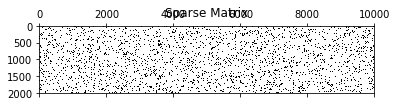

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(dataset) #visulize the sparsity of the data using spy
plt.title("Sparse Matrix")

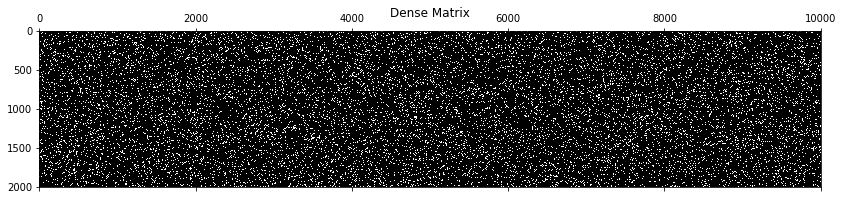

In [32]:
np.random.seed(seed=43)
plt.figure(figsize=(14,12))
plt.spy(np.random.binomial(1, 0.9, 20000000).reshape(2000,10000))
plt.title("Dense Matrix");

In [35]:
from scipy.sparse import csr_matrix
sparse_dataset = csr_matrix(dataset)

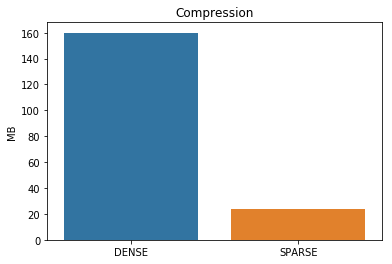

In [36]:
import seaborn as sns

dense_size = np.array(dataset).nbytes/1e6
sparse_size = (sparse_dataset.data.nbytes + sparse_dataset.indptr.nbytes + sparse_dataset.indices.nbytes)/1e6

sns.barplot(['DENSE', 'SPARSE'], [dense_size, sparse_size])
plt.ylabel('MB')
plt.title('Compression')

Wow! The compression graph above shows that DENSE matrix is 160 MB while the SPARSE matrix is 24 MB - 85% compression. 

However, it is clear now that Sparse matrix is memory efficient, but let's also compare the computing time for both: 
<h3> Computing time </h3> 
Let's run a few classification algorithams - Bernoulli Naive Bayes, Logistic Regression, Support Vector Machines - and check processing times for each.

In [38]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB(binarize=None)
%timeit nb.fit(dataset, y)
%timeit nb.fit(sparse_dataset, y)

157 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.6 ms ± 5.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Wow! 88% decrease in the processing time while the Naive Bayes classifier operate on Sparse matrix. Meaning - Naive Bayes classifier runs 8 times faster when operating on the sparse matrix compare to the dense matrix. 

In [40]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=99)
%timeit lr.fit(dataset, y)
%timeit lr.fit(sparse_dataset, y)

644 ms ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
366 ms ± 68.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We see around 43% decrease in processing time. Though, not quite as performant as Naive Bayes but a big difference nonetheless.

In [51]:
#Support Vector Machine
from sklearn.svm import LinearSVC
svc = LinearSVC()
%timeit svc.fit(dataset, y)
%timeit svc.fit(sparse_dataset, y)

485 ms ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
227 ms ± 32.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Impresive! With Sparse matrix, we have managed to reduce the computing time for SVM by almost 50%.  